<a href="https://colab.research.google.com/github/ZemelakGoraga/Data-Analytics-Capstone/blob/main/live_animals_import_project_as_of_14th_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Topic:** "Unveiling Global Cattle Trade Patterns: Insights from
FAOSTAT's Dataset"

**Step 1. Understanding the Business Objective**

**Business Objective:**

To optimize cattle import strategies for different countries by analyzing historical data, identifying trends and anomalies, predicting future import quantities, and recommending prescriptive actions to maximize efficiency.

**Step 2. Formulating SMART Research Questions:**


**Questions to address:**

1. Descriptive Question:
What is the trend in import quantity of cattle across different countries over the years?

2. Diagnostic Question:
Are there specific years or countries where there have been significant changes in cattle import quantity?

3. Predictive Question:
Can we predict the future import quantity of cattle for a specific country?

4. Prescriptive Question:
What strategies can be implemented to optimize cattle import quantities while considering different countries and years?

**Step 3. Data Collection & inspection:**

In [1]:
# Data Collection
# Loading datasets from Kaggle
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelak","key":"08c8054de361c9898298da09f2007bec"}'}

In [2]:
# Next
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json


# Next
# Next, install the Kaggle API client.
!pip install -q kaggle

# Next
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


-rw-r--r-- 1 root root 63 Aug 15 03:47 kaggle.json


In [3]:
# Next

# List the datasets
# 'kaggle datasets download -d unitednations/global-food-agriculture-statistics' this is the specific database we want to download from kaggle. N.B it may have multiple datasets. check

!kaggle datasets download -d unitednations/global-food-agriculture-statistics


 99% 440M/444M [00:16<00:00, 33.0MB/s]
100% 444M/444M [00:16<00:00, 28.3MB/s]


In [4]:
# unzip and list the different data files

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/global-food-agriculture-statistics.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)


current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissi

In [5]:
# Download a specific dataset to work with: e.g. the undermentioned LiveAnimals dataset.
# Display the first 5 rows of the dataset

import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv"

# Read the ZIP archive
with ZipFile("/content/global-food-agriculture-statistics.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')


['current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv', 'curr

In [ ]:
# Viewing Data: display the first 5 rows of the dataset

print(df.head())


   Area Code         Area  Item Code    Item  Element Code          Element  \
0          2  Afghanistan        866  Cattle          5608  Import Quantity   
1          2  Afghanistan        866  Cattle          5608  Import Quantity   
2          2  Afghanistan        866  Cattle          5608  Import Quantity   
3          2  Afghanistan        866  Cattle          5608  Import Quantity   
4          2  Afghanistan        866  Cattle          5608  Import Quantity   

   Year Code  Year  Unit  Value Flag  
0       1961  1961  Head    NaN    M  
1       1962  1962  Head    NaN    M  
2       1963  1963  Head    NaN    M  
3       1964  1964  Head    NaN    M  
4       1965  1965  Head    NaN    M  


In [6]:
# Display the last 5 rows of the dataset

print(df.tail())

        Area Code                                     Area  Item Code  \
662953       5817  Net Food Importing Developing Countries       1922   
662954       5817  Net Food Importing Developing Countries       1922   
662955       5817  Net Food Importing Developing Countries       1922   
662956       5817  Net Food Importing Developing Countries       1922   
662957       5817  Net Food Importing Developing Countries       1922   

                   Item  Element Code       Element  Year Code  Year  \
662953  Sheep and Goats          5922  Export Value       2009  2009   
662954  Sheep and Goats          5922  Export Value       2010  2010   
662955  Sheep and Goats          5922  Export Value       2011  2011   
662956  Sheep and Goats          5922  Export Value       2012  2012   
662957  Sheep and Goats          5922  Export Value       2013  2013   

            Unit      Value Flag  
662953  1000 US$   456293.0    A  
662954  1000 US$   421311.0    A  
662955  1000 US$   6493

In [7]:
#Understanding the Structure
# Get the number of rows and columns
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")



Number of rows: 662958
Number of columns: 11


In [9]:
# Display column names
print("\nColumn names:")
print(df.columns)



Column names:
Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')


In [11]:
# Display data types of columns
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object


In [14]:
# Display unique values count for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nPotential Data Quality Issues (Categorical Columns):")
for column in categorical_columns:
    unique_values_count = df[column].nunique()
    print(f"{column}: {unique_values_count} unique values")



Potential Data Quality Issues (Categorical Columns):
Area: 252 unique values
Item: 25 unique values
Element: 4 unique values
Unit: 4 unique values
Flag: 5 unique values


In [32]:
# Viewing unique values within each column

unique_areas = df['Area'].unique()

unique_items = df['Item'].unique()

unique_elements = df['Element'].unique()

unique_flags = df['Flag'].unique()

unique_years = df['Year'].unique()

print("Unique Areas:", unique_areas)

print("Unique Items:", unique_items)

print("Unique Elements:", unique_elements)

print("Unique Flags:", unique_flags)

print("Year:", unique_years)


Unique Areas: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethio

In [33]:
# 'Elements' column contains these unique values: ['Import Quantity' 'Import Value' 'Export Quantity' 'Export Value']
# However, I am interested in analyzing the ' Import Quantity' values
# So, here below, I am going to filter the dataset where 'Element' == 'Import Quantity'
# I need also only the following columns:  ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']

selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
df_import_quantity = df[df['Element'] == 'Import Quantity'][selected_columns]

print("Selected Data:")
print(df_import_quantity)

# Save as df_import_quantity.csv
df_import_quantity.to_csv('df_import_quantity.csv', index=False)

# Display the first few rows of df_import_quantity
print(df_import_quantity.head())

Selected Data:
                                           Area             Item  \
0                                   Afghanistan           Cattle   
1                                   Afghanistan           Cattle   
2                                   Afghanistan           Cattle   
3                                   Afghanistan           Cattle   
4                                   Afghanistan           Cattle   
...                                         ...              ...   
662794  Net Food Importing Developing Countries  Sheep and Goats   
662795  Net Food Importing Developing Countries  Sheep and Goats   
662796  Net Food Importing Developing Countries  Sheep and Goats   
662797  Net Food Importing Developing Countries  Sheep and Goats   
662798  Net Food Importing Developing Countries  Sheep and Goats   

                Element  Year  Unit         Value  
0       Import Quantity  1961  Head  5.111931e+06  
1       Import Quantity  1962  Head  5.111931e+06  
2       Impo

In [34]:
# for the sake of simplicity, I will save 'df_import_quantity' dataset as df1 as follows

import pandas as pd

# Assuming df_import_quantity exists
df1 = df_import_quantity.copy()  # Make a copy of the DataFrame if you want to save it as df1

# Save the DataFrame as a CSV file
df1.to_csv('df1.csv', index=False)  # Index=False prevents saving the row indices


In [37]:
# Let us check if the column ' Element' in the df1 dataset contains only one unique value which is 'import_quantity'
unique_elements = df1['Element'].unique()
print("Unique Elements:", unique_elements)

Unique Elements: ['Import Quantity']


In [38]:
# Viewing the df1 dataset

df1.head()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Cattle,Import Quantity,1961,Head,5.111931e+06
1,Afghanistan,Cattle,Import Quantity,1962,Head,5.111931e+06
2,Afghanistan,Cattle,Import Quantity,1963,Head,5.111931e+06
3,Afghanistan,Cattle,Import Quantity,1964,Head,5.111931e+06
4,Afghanistan,Cattle,Import Quantity,1965,Head,5.111931e+06


In [39]:
# Viewing the df1 dataset

df1.tail()

,Area,Item,Element,Year,Unit,Value
662794,Net Food Importing Developing Countries,Sheep and Goats,Import Quantity,2009,Head,2443476.0
662795,Net Food Importing Developing Countries,Sheep and Goats,Import Quantity,2010,Head,2885658.0
662796,Net Food Importing Developing Countries,Sheep and Goats,Import Quantity,2011,Head,2702259.0
662797,Net Food Importing Developing Countries,Sheep and Goats,Import Quantity,2012,Head,3301420.0
662798,Net Food Importing Developing Countries,Sheep and Goats,Import Quantity,2013,Head,2998137.0


In [40]:
df1.shape

(147865, 6)

In [41]:
# The 'Item' Column contains several live animals and products, however, I am interested in working with 'Cattle'.
# So, let me filter the df1 dataset where Item == Cattle and save it as cattle


selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
cattle = df1[df1['Item'] == 'Cattle'][selected_columns]

print("Selected Data:")
print(cattle)

# Save as cattle.csv
cattle.to_csv('cattle.csv', index=False)

# Display the first few rows of df_import_quantity
print(cattle.head())

Selected Data:
                                           Area    Item          Element  \
0                                   Afghanistan  Cattle  Import Quantity   
1                                   Afghanistan  Cattle  Import Quantity   
2                                   Afghanistan  Cattle  Import Quantity   
3                                   Afghanistan  Cattle  Import Quantity   
4                                   Afghanistan  Cattle  Import Quantity   
...                                         ...     ...              ...   
660038  Net Food Importing Developing Countries  Cattle  Import Quantity   
660039  Net Food Importing Developing Countries  Cattle  Import Quantity   
660040  Net Food Importing Developing Countries  Cattle  Import Quantity   
660041  Net Food Importing Developing Countries  Cattle  Import Quantity   
660042  Net Food Importing Developing Countries  Cattle  Import Quantity   

        Year  Unit         Value  
0       1961  Head  5.111931e+06  
1 

In [42]:
# Display the last few rows of df_import_quantity
print(cattle.tail())

                                           Area    Item          Element  \
660038  Net Food Importing Developing Countries  Cattle  Import Quantity   
660039  Net Food Importing Developing Countries  Cattle  Import Quantity   
660040  Net Food Importing Developing Countries  Cattle  Import Quantity   
660041  Net Food Importing Developing Countries  Cattle  Import Quantity   
660042  Net Food Importing Developing Countries  Cattle  Import Quantity   

        Year  Unit      Value  
660038  2009  Head  1113191.0  
660039  2010  Head  1599145.0  
660040  2011  Head  1311693.0  
660041  2012  Head  1649940.0  
660042  2013  Head  2217707.0  


In [43]:
cattle.shape

(11280, 6)

**Step 4. Data Cleaning:**

In [13]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           135190
Flag            203064
dtype: int64


In [16]:

# Display potential data quality issues (min-max range) for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nPotential Data Quality Issues (Numerical Columns):")
for column in numerical_columns:
    column_range = df[column].max() - df[column].min()
    print(f"{column}: Range = {column_range}")


Potential Data Quality Issues (Numerical Columns):
Area Code: Range = 57059
Item Code: Range = 1972
Element Code: Range = 315
Year Code: Range = 52
Year: Range = 52
Value: Range = 18818758989.0


In [17]:
# Impute missing values

import pandas as pd

# Impute missing values with mean for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [18]:
# check missing values were replaced by the 'mean' values
# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value                0
Flag            203064
dtype: int64


In [ ]:
#Data Type Conversion: Convert data types if necessary, such as converting string dates to datetime objects or categorical variables to categorical data types.


In [ ]:
# #Removing Duplicates: Check for and remove duplicate rows using df.duplicated() and df.drop_duplicates().


In [ ]:
# #Outliers: Identify and handle outliers by using visualization tools or statistical methods.


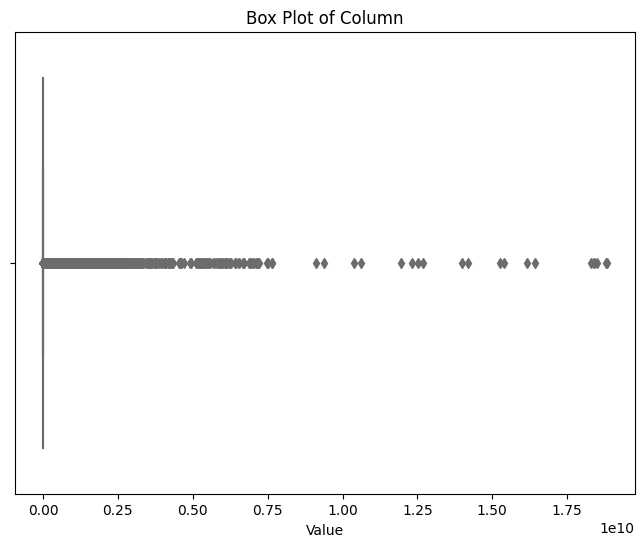

Detected Outliers:
        Area Code                                     Area  Item Code  \
22394          10                                Australia         10   
22395          10                                Australia         10   
22396          10                                Australia         10   
22447          10                                Australia         10   
22448          10                                Australia         10   
...           ...                                      ...        ...   
662211       5817  Net Food Importing Developing Countries         10   
662212       5817  Net Food Importing Developing Countries         10   
662213       5817  Net Food Importing Developing Countries         10   
662214       5817  Net Food Importing Developing Countries         10   
662215       5817  Net Food Importing Developing Countries         10   

                           Item  Element Code       Element  Year Code  Year  \
22394   Total Merchandis

In [ ]:
# Detect data outliers and anomalies
# Box Plots: Outliers appear as individual data points outside the whiskers.

import matplotlib.pyplot as plt
import seaborn as sns


# Box plot for a specific column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Column')
plt.show()



# Z-Score: Calculate the Z-score for each data point. Z-score measures how many standard deviations a data point is away from the mean. Typically, a threshold of around 2 or 3 is used to identify outliers.

from scipy.stats import zscore

# Calculate Z-scores for the 'Value' column (or the correct column name)
z_scores = zscore(df['Value'])  # Replace 'Value' with the correct column name
outliers = df[abs(z_scores) > 2]  # Adjust threshold as needed
print("Detected Outliers:")
print(outliers)


# IQR (Interquartile Range): Calculate the IQR for a column and identify outliers that fall outside the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR.

# Calculate Q1, Q3, and IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Value'] < Q1 - 1.5 * IQR) | (df['Value'] > Q3 + 1.5 * IQR)]
print("Detected Outliers:")
print(outliers)




**Step 5. Data Preprocessing:**

5.1. Feature engineering: Create some new features from the df dataset to enhance model performance.
5.2. Data encoding: Convert categorical variables into numerical representations.
5.3. Data scaling: Scale numerical features to bring them within a similar range.
5.4. Dimensionality reduction: Apply techniques like PCA to reduce the number of features.

**Step 6. Data Transformation:**

6.1. Apply transformations like log or square root to handle skewed data.

6.2. Handle multicollinearity among features to avoid model instability.

6.3. Perform one-hot encoding or label encoding for categorical variables.

In [ ]:
# 5.2. Address data outliers and anomalies using appropriate techniques.

# Apply log transformation to a numerical column

import numpy as np

df['Value'] = df['Value'].apply(lambda x: np.log(x) if x > 0 else x)








In [ ]:
#Data Transformation: Transform data as needed, such as scaling numerical features, encoding categorical variables, or creating new features.


**Step 7. Data Sampling:**

7.1. Determine if data imbalances exist and consider techniques like oversampling or undersampling.


**Step 8. Data Exploration:**


In [ ]:
# Step 4. Data Exploration:

# 4.3. Calculate summary statistics to gain a basic understanding of the data's distribution.

# Sorting the dataset

# Calculate summary statistics for numerical columns
summary_stats = df['Value'].describe()
print("Summary Statistics:")
print(summary_stats)

# Calculate summary statistics for specific columns
specific_columns = ['Value']  # Replace with your column names
specific_stats = df[specific_columns].describe()
print("\nSummary Statistics for Specific Columns:")
print(specific_stats)


Summary Statistics:
count    5.277680e+05
mean     5.111931e+06
std      1.306099e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+02
75%      1.911800e+04
max      1.881876e+10
Name: Value, dtype: float64

Summary Statistics for Specific Columns:
              Value
count  5.277680e+05
mean   5.111931e+06
std    1.306099e+08
min    0.000000e+00
25%    0.000000e+00
50%    2.000000e+02
75%    1.911800e+04
max    1.881876e+10


In [ ]:
#Visualization: Create visualizations like histograms, bar charts, scatter plots, and line charts to explore relationships, trends, and patterns in the data.


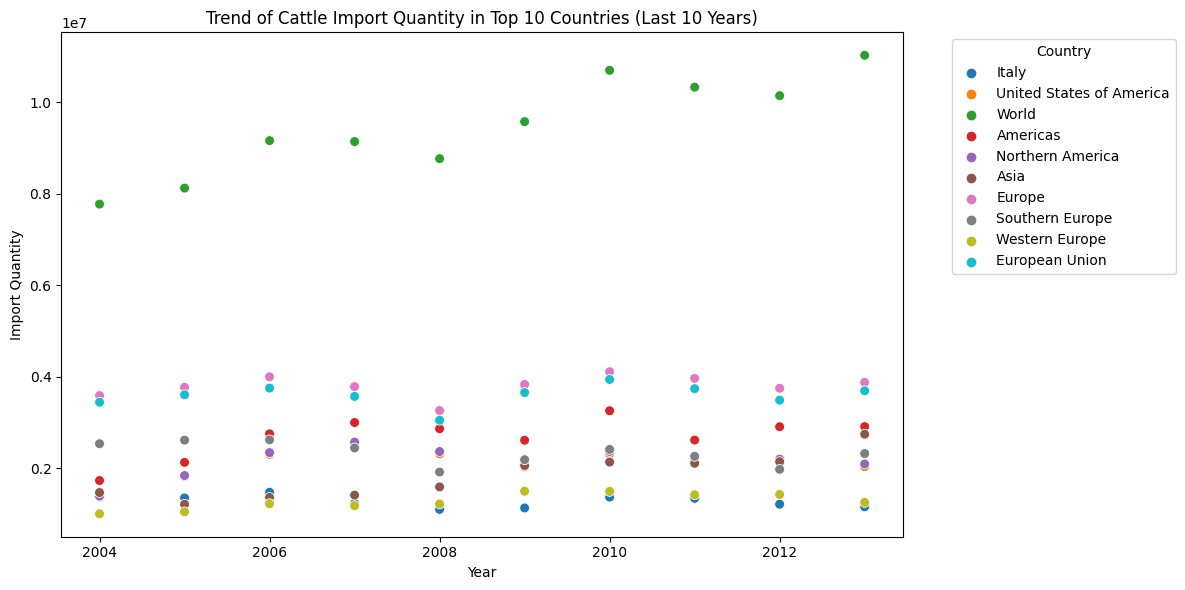

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the dataset for Cattle import quantity and the last 10 years
cattle_import_df = df[(df['Item'] == 'Cattle') & (df['Element'] == 'Import Quantity')]
last_10_years = df['Year'].max() - 9
cattle_import_last_10_years = cattle_import_df[cattle_import_df['Year'] >= last_10_years]

# Select the top 10 countries
top_10_countries = cattle_import_last_10_years.groupby('Area')['Value'].sum().nlargest(10).index
cattle_import_top_10 = cattle_import_last_10_years[cattle_import_last_10_years['Area'].isin(top_10_countries)]

# Create a scatter plot to visualize the trend of Cattle import quantity in the top 10 countries
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cattle_import_top_10, x='Year', y='Value', hue='Area', palette='tab10', s=50)
plt.title("Trend of Cattle Import Quantity in Top 10 Countries (Last 10 Years)")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-104-132e9d3c6465>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cattle_import['Percentage_Change'] = cattle_import.groupby('Area')['Value'].pct_change() * 100


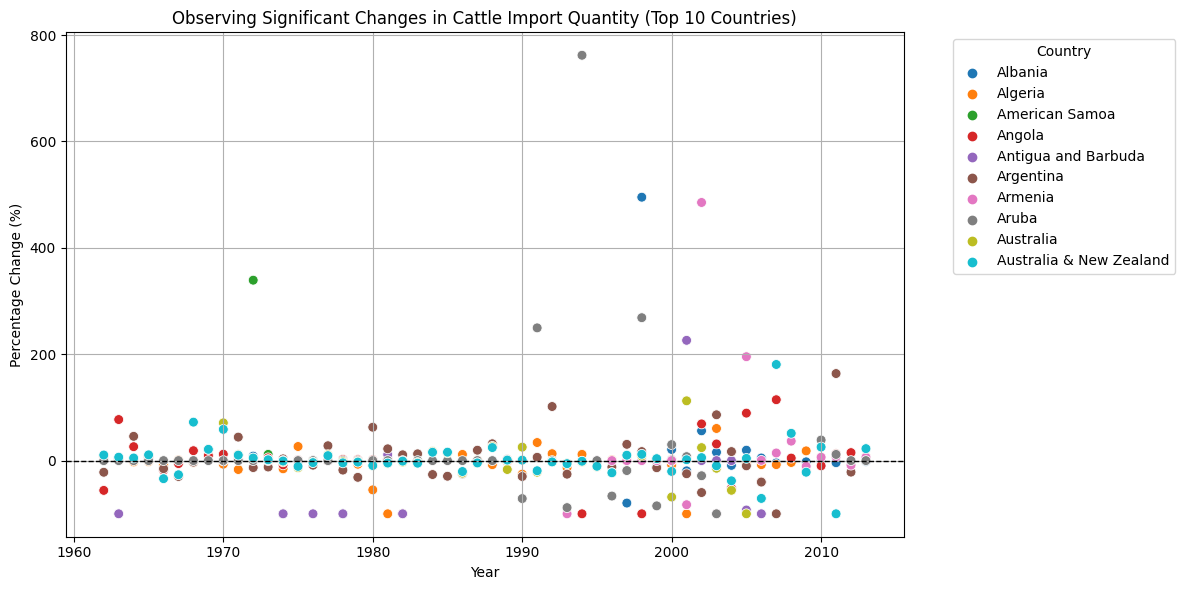

In [ ]:
# Q2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the dataset for 'Cattle' and 'Import Quantity'
cattle_import = df[(df['Item'] == 'Cattle') & (df['Element'] == 'Import Quantity')]

# Calculate the percentage change in import quantity for each year and country
cattle_import['Percentage_Change'] = cattle_import.groupby('Area')['Value'].pct_change() * 100

# Get the top 10 countries by maximum absolute percentage change
top_countries = cattle_import.groupby('Area')['Percentage_Change'].apply(lambda x: x.abs().max()).nlargest(10).index

# Filter the data for top 10 countries
top_countries_data = cattle_import[cattle_import['Area'].isin(top_countries)]

# Create a scatter plot to observe significant changes in cattle import quantity for top 10 countries
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_countries_data, x='Year', y='Percentage_Change', hue='Area', s=50)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Zero line
plt.title("Observing Significant Changes in Cattle Import Quantity (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


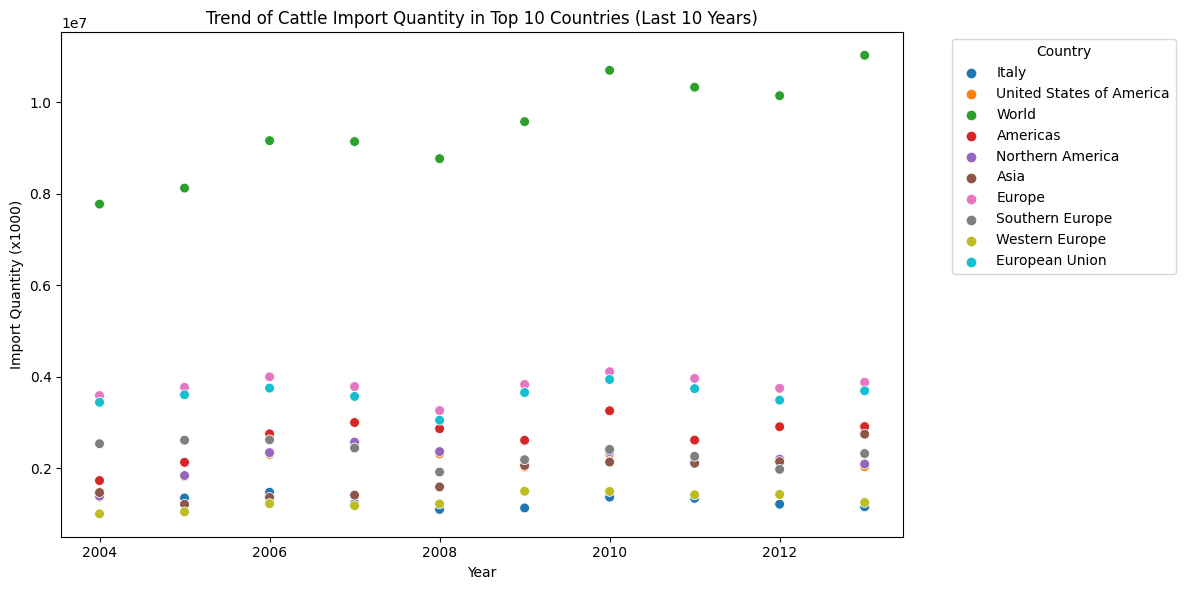

In [ ]:
# Q1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your df dataset
# df = ...

# Filter the dataset for Cattle import quantity and the last 10 years
cattle_import_df = df[(df['Item'] == 'Cattle') & (df['Element'] == 'Import Quantity')]
last_10_years = df['Year'].max() - 9
cattle_import_last_10_years = cattle_import_df[cattle_import_df['Year'] >= last_10_years]

# Select the top 10 countries
top_10_countries = cattle_import_last_10_years.groupby('Area')['Value'].sum().nlargest(10).index
cattle_import_top_10 = cattle_import_last_10_years[cattle_import_last_10_years['Area'].isin(top_10_countries)]

# Multiply the 'Value' by 1000
cattle_import_top_10['Value'] * 1000

# Create a scatter plot to visualize the trend of Cattle import quantity in the top 10 countries
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cattle_import_top_10, x='Year', y='Value', hue='Area', palette='tab10', s=50)
plt.title("Trend of Cattle Import Quantity in Top 10 Countries (Last 10 Years)")
plt.xlabel("Year")
plt.ylabel("Import Quantity (x1000)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


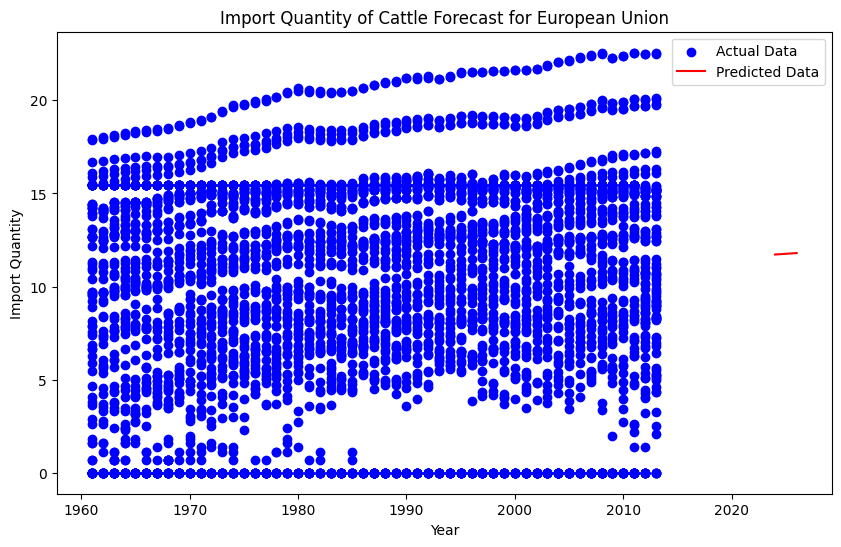

In [ ]:
# Q4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Select a specific country for prediction
country_to_predict = 'European Union'  # Replace with your country

# Filter the data for the selected country
country_data = df[df['Area'] == country_to_predict]

# Prepare the data for regression
X = country_data['Year'].values.reshape(-1, 1)
y = country_data['Value'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict import quantity for future years
future_years = np.array([2024, 2025, 2026])  # Replace with your desired years
predicted_imports = model.predict(future_years.reshape(-1, 1))

# Visualize the predicted import quantities
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(future_years, predicted_imports, color='red', label='Predicted Data')
plt.title(f"Import Quantity of Cattle Forecast for {country_to_predict}")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend()
plt.show()


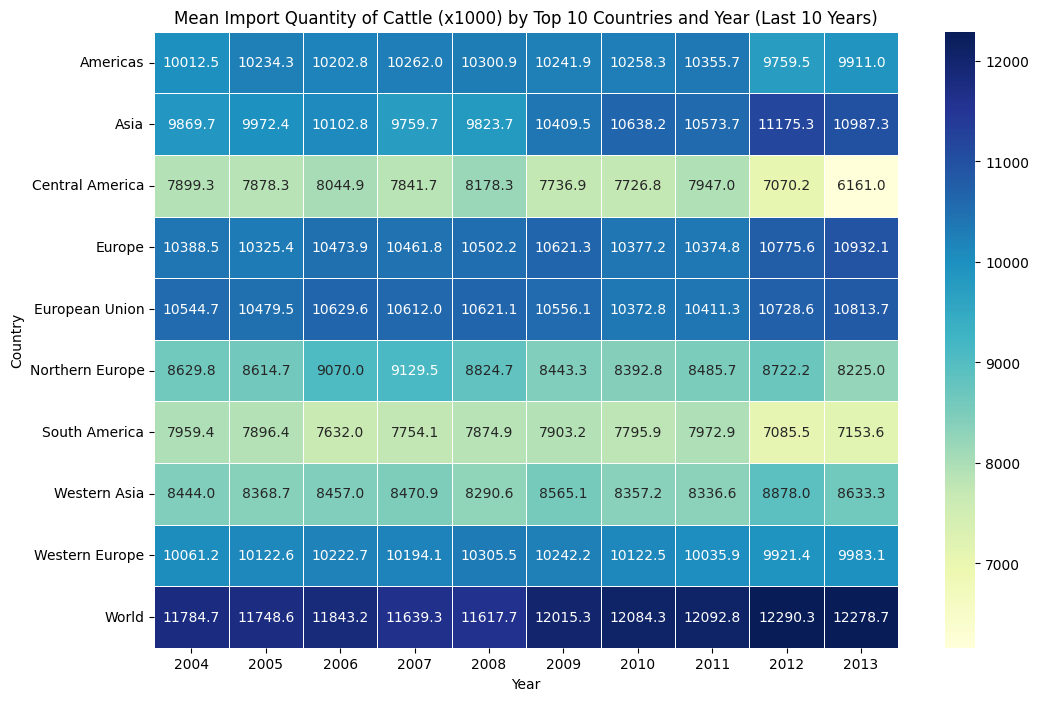

In [ ]:
# Q4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for analysis
relevant_columns = ['Area', 'Year', 'Value']  # Modify as needed
data = df[relevant_columns]

# Get the top 10 countries
top_countries = data['Area'].value_counts().head(10).index

# Filter data for the top 10 countries and last 10 years
top_data = data[data['Area'].isin(top_countries) & (data['Year'] >= data['Year'].max() - 9)]

# Group data by 'Area' and 'Year' and calculate the mean import quantity
grouped_data = top_data.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = grouped_data.pivot_table(index='Area', columns='Year', values='Value')

# Multiply the values by 1000
heatmap_data *= 1000

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Mean Import Quantity of Cattle (x1000) by Top 10 Countries and Year (Last 10 Years)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


In [ ]:
#Correlation Analysis: Use correlation matrices or heatmaps to explore relationships between numerical variables.


**Step 9. Hypothesis Formulation:**

9.1. Define the null and alternative hypotheses based on the research questions.

9.2. Determine the appropriate statistical tests to evaluate the hypotheses.

9.3. Set the significance level for hypothesis testing.

**Descriptive Question:** What is the trend in import quantity of cattle across different countries over the years?

Hypothesis Test: One-Way ANOVA (Analysis of Variance) to determine if there are significant differences in import quantities among different countries over the years.

Statistical Analysis: Calculate the mean and standard deviation of import quantities for each country. Perform ANOVA and post-hoc tests (e.g., Tukey's HSD) to identify countries with significantly different import quantities.

**Predictive Question:** Can we predict the future import quantity of cattle for a specific country?

Hypothesis Test: None (this question is more focused on prediction than hypothesis testing).

Statistical Analysis: Time Series Analysis, possibly using techniques like ARIMA (AutoRegressive Integrated Moving Average) or Prophet, to build a predictive model. Evaluate the model's performance using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

**Prescriptive Question:** What strategies can be implemented to optimize cattle import quantities while considering different countries and years?

Hypothesis Test: Two-Sample T-Test to compare the mean import quantities between two different groups (e.g., countries with different economic conditions).

Statistical Analysis: Divide countries into relevant groups (e.g., high GDP vs. low GDP) and perform a T-Test to determine if there's a significant difference in import quantities. Analyze effect sizes to understand the practical significance

**Step 12. Statistical Analysis:**

12.1. Conduct the selected statistical tests on relevant data subsets.

Example code to perform this ... Appropriate Statistical Test: To test for significant shifts in cattle import sources among countries, you might consider using a Chi-Square test for independence or multinomial logistic regression, depending on the nature of your data and the factors influencing the shifts. Calculate also the effect size using an appropriate measure.

12.2. Interpret the results of hypothesis tests to draw meaningful conclusions.

Interpret the results of the first hypothesis test. Use this result as an input ... Consider p-values and effect sizes to determine the significance of this findings.

12.3. Consider p-values and effect sizes to determine the significance of this findings.


Step 13. Machine Learning Model Selection:

13.1. Propose alternative machine learning algorithms based on the problem type


13.2. Select a set of candidate models to proceed with further evaluation.


Step 14. Model Training and Evaluation:

14.1. Split the dataset into training and validation sets for model training and evaluation.
14.2. Train the selected models on the training set using appropriate performance metrics.
14.3. Evaluate model performance on the validation set and compare results.
14.4. Elaborate the best model

Step 15. Feature Importance and Selection:

15.1. Use feature importance techniques like feature importance scores or feature selection algorithms.
15.2. Identify the most relevant features that contribute significantly to the model's performance.

Step 16. Model Tuning:

16.1. Perform hyperparameter tuning for the selected machine learning models.
16.2. Use techniques like grid search or random search to optimize model performance.

Step 17. Model Interpretation:

17.1. Analyze model outputs and interpret model predictions.
17.2. Use techniques like SHAP values or partial dependence plots to understand feature effects.




Step 18. Insights and Key Findings:

18.1. Summarize the main insights and key findings from the analysis.
18.2. Link the findings to the initial business objectives and research questions.

Step 19. Data Storytelling:

19.1. Craft a narrative around the data, incorporating key findings and insights.
19.2. Present the data story in a compelling and understandable manner to stakeholders.





Step 20. Sensitivity Analysis:

20.1. Conduct sensitivity analysis on critical model parameters or assumptions.
20.2. Assess how changes in these variables impact the overall results.



Step 21. Limitations and Assumptions:

21.1. Identify and document any limitations or assumptions made during the analysis.
21.2. Communicate the potential impact of these limitations on the findings.

Step 22. Conclusion:

22.1. Summarize the project's outcome, identified key insights, and the overall success in achieving the business objectives.
22.2. Reflect on the data analysis process and its effectiveness.

Step 23. Recommendations:

23.1. Provide actionable recommendations based on the insights gained from the analysis.
23.2. Suggest potential strategies for addressing the identified business problem.




Step 24. Documentation:

24.1. Create comprehensive documentation of the entire data analytics process, including data sources, methodologies, and tools used.

Step 25. Quality Assurance:

25.1. Implement quality assurance measures to validate the accuracy and reliability of the analysis.
25.2. Review the analysis process for potential errors or inconsistencies.

Step 26. Data Governance and Security:

26.1. Ensure compliance with data governance policies and regulations.
26.2. Protect sensitive data and maintain data security throughout the analysis.

Step 27. Data Ethics:

27.1. Consider and address ethical implications related to data collection, analysis, and model deployment.
27.2. Avoid bias and ensure fairness in the analysis.

Step 28. Project Management:

28.1. Develop a project plan with clear timelines and milestones.
28.2. Track progress throughout the project to ensure timely completion.

Step 29. Communication:

29.1. Plan how the findings will be communicated to stakeholders.
29.2. Tailor the communication approach based on the audience's technical knowledge.

Step 30. Feedback and Iteration:

30.1. Seek feedback from stakeholders on the analysis and recommendations.
30.2. Incorporate feedback to improve the analysis and address any concerns.

Step 31. Model Deployment:

31.1. Prepare the model for deployment in a production environment.
31.2. Monitor the model's performance and make necessary adjustments over time.
31.3. Perform A/B Testing
32. Create comprehensive documentation of the entire data analytics process, including data sources, methodologies, and tools used.